In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# Visualizing angles

In [240]:
df0 = pd.read_csv('data_with_labels_proper2.csv')
df0 = df0.drop(['Timestamp'], axis=1)
df0.head()

df_back_mid = df0[['q0_back_mid', 'q1_back_mid', 'q2_back_mid', 'q3_back_mid']]
df_back_low = df0[['q0_back_low', 'q1_back_low', 'q2_back_low', 'q3_back_low']]
df_neck = df0[['q0_neck', 'q1_neck', 'q2_neck', 'q3_neck']]

angles_back_mid = []
angles_back_low = []
angles_neck = []

for i, row in df_back_mid.iterrows():
    r = R.from_quat(df_back_mid.iloc[i])
    angles_back_low.append(r.as_euler('zyx', degrees=True))

for i, row in df_back_low.iterrows():
    r = R.from_quat(df_back_low.iloc[i])
    angles_back_mid.append(r.as_euler('zyx', degrees=True))
    
for i, row in df_neck.iterrows():
    r = R.from_quat(df_neck.iloc[i])
    angles_neck.append(r.as_euler('zyx', degrees=True))
    

In [241]:
df_angles_neck = pd.DataFrame(angles_neck, columns=['a1_neck', 'a2_neck', 'a3_neck'])
df_angles_back_mid = pd.DataFrame(angles_back_mid, columns=['a1_bm', 'a2_bm', 'a3_bm'])
df_angles_back_low = pd.DataFrame(angles_back_low, columns=['a1_bl', 'a2_bl', 'a3_bl'])

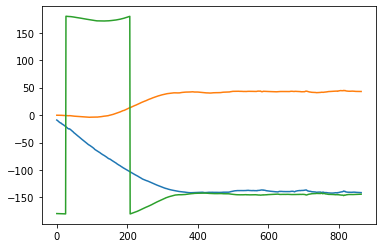

In [242]:
plt.plot(df_angles_neck['a1_neck'])
plt.plot(df_angles_neck['a2_neck'])
plt.plot(df_angles_neck['a3_neck'])

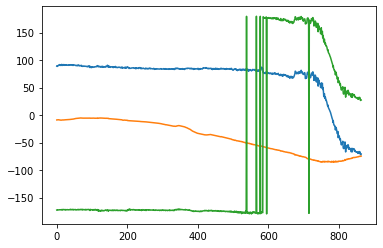

In [243]:
plt.plot(df_angles_back_low['a1_bl'])
plt.plot(df_angles_back_low['a2_bl'])
plt.plot(df_angles_back_low['a3_bl'])

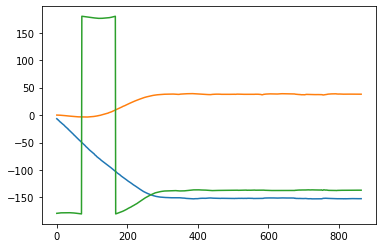

In [244]:
plt.plot(df_angles_back_mid['a1_bm'])
plt.plot(df_angles_back_mid['a2_bm'])
plt.plot(df_angles_back_mid['a3_bm'])

# Pre-process the data

## Data from data_with_labels_forward.csv are spoilt after epoch 600

In [223]:
df0 = pd.read_csv('data_with_labels_forward.csv')
df0 = df0.drop(['Timestamp'], axis=1)
df0 = df0[0:600]
df0.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.752886,-0.416104,-0.237704,0.447382,0.517248,-0.316295,0.453605,-0.650616,-0.507395,0.294262,0.322177,-0.740903,0
1,0.757055,-0.408983,-0.237987,0.446774,0.507800,-0.308021,0.467234,-0.652381,-0.506942,0.297374,0.319236,-0.741220,0
2,0.756517,-0.411024,-0.229891,0.450038,0.519034,-0.302122,0.478482,-0.637972,-0.504627,0.303594,0.313305,-0.742806,0
3,0.751689,-0.419989,-0.237990,0.445797,0.514019,-0.306143,0.493954,-0.628415,-0.503852,0.309046,0.330900,-0.733370,0
4,0.744534,-0.428553,-0.237795,0.449564,0.507717,-0.322238,0.494073,-0.625285,-0.501926,0.309918,0.326013,-0.736569,0


## The rest are okay

In [140]:
df1 = pd.read_csv('data_with_labels_left.csv')
df1 = df1.drop(['Timestamp'], axis=1)
df1.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.750367,-0.648955,0.042628,0.104173,0.522966,-0.711594,0.456799,-0.091474,-0.175881,0.289614,0.573328,-0.743892,1
1,0.749800,-0.650357,0.038996,0.100809,0.520984,-0.712642,0.457674,-0.090251,-0.176987,0.288468,0.572375,-0.744643,1
2,0.753487,-0.646044,0.038321,0.100267,0.517574,-0.715469,0.457153,-0.090798,-0.179893,0.286297,0.568916,-0.747430,1
3,0.749833,-0.650067,0.040890,0.101768,0.523598,-0.712786,0.453796,-0.092161,-0.181900,0.284410,0.565983,-0.749888,1
4,0.752042,-0.647520,0.039814,0.101045,0.516340,-0.717222,0.455593,-0.091226,-0.180423,0.293457,0.574655,-0.740099,1


In [141]:
df2 = pd.read_csv('data_with_labels_right.csv')
df2 = df2.drop(['Timestamp'], axis=1)
df2.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,-0.754631,0.607717,0.198710,-0.136428,-0.310121,0.513591,-0.506182,0.616822,-0.150727,0.070215,0.610858,-0.771977,2
1,-0.757188,0.604833,0.195120,-0.139340,-0.309459,0.513939,-0.509339,0.614253,-0.147718,0.075778,0.604328,-0.777089,2
2,-0.762033,0.598859,0.196360,-0.136963,-0.304128,0.518360,-0.507504,0.614888,-0.146627,0.079953,0.618757,-0.765565,2
3,-0.757815,0.604509,0.196225,-0.136560,-0.308633,0.513716,-0.508799,0.615298,-0.154680,0.077728,0.614858,-0.767206,2
4,-0.758693,0.602956,0.199975,-0.132215,-0.308036,0.514994,-0.511494,0.612501,-0.159124,0.077061,0.616753,-0.764840,2


In [142]:
df3 = pd.read_csv('data_with_labels_backward.csv')
df3 = df3.drop(['Timestamp'], axis=1)
df3.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.023912,-0.019588,-0.692620,0.718296,-0.173281,0.329696,-0.787138,0.488427,0.758468,-0.647141,0.052838,-0.000358,3
1,0.022385,-0.021215,-0.696411,0.714849,-0.176642,0.326846,-0.785567,0.491573,0.751291,-0.655200,0.055977,0.001204,3
2,0.024302,-0.019183,-0.699380,0.711923,-0.175949,0.327179,-0.785971,0.490799,0.758059,-0.647314,0.054382,-0.002378,3
3,0.024928,-0.019176,-0.695201,0.715787,-0.174310,0.328257,-0.787097,0.489200,0.756482,-0.648626,0.062228,0.000697,3
4,0.026328,-0.014902,-0.687877,0.722879,-0.172943,0.329113,-0.790119,0.484018,0.759699,-0.644798,0.061080,-0.002525,3


In [143]:
df4 = pd.read_csv('data_with_labels_proper.csv')
df4 = df4.drop(['Timestamp'], axis=1)
df4.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.430204,-0.415639,0.581813,-0.548180,0.347383,-0.366078,-0.611935,0.606211,-0.150915,0.023693,-0.663352,0.730415,4
1,0.433612,-0.411523,0.582412,-0.548003,0.348035,-0.366469,-0.611681,0.605854,-0.147620,0.025478,-0.666366,0.728290,4
2,0.432539,-0.411657,0.585990,-0.544949,0.349273,-0.365591,-0.603104,0.614205,-0.149073,0.023293,-0.664677,0.729601,4
3,0.433243,-0.410586,0.583593,-0.547768,0.352002,-0.364056,-0.605835,0.611085,-0.142785,0.025146,-0.664992,0.730479,4
4,0.434384,-0.409321,0.581106,-0.550206,0.346908,-0.370020,-0.614501,0.601517,-0.143758,0.022178,-0.667295,0.728151,4


In [41]:
df5 = pd.read_csv('data_with_labels_unknown.csv')
df5 = df5.drop(['Timestamp'], axis=1)
df5.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.919277,0.030660,0.003915,0.388075,0.994306,0.039714,0.060256,-0.052719,0.799528,-0.154516,-0.086804,0.570950,5
1,0.918756,0.030781,0.005564,0.389276,0.994334,0.037862,0.060720,-0.052983,0.800059,-0.151663,-0.084596,0.571301,5
2,0.918650,0.026354,0.008048,0.389810,0.994543,0.039644,0.056157,-0.052786,0.800969,-0.147603,-0.086595,0.570785,5
3,0.918486,0.031728,0.008792,0.389776,0.994708,0.037088,0.054867,-0.052870,0.799869,-0.154400,-0.086976,0.570463,5
4,0.918494,0.030398,0.005556,0.389923,0.994538,0.038014,0.057256,-0.052886,0.800301,-0.154396,-0.085758,0.570056,5


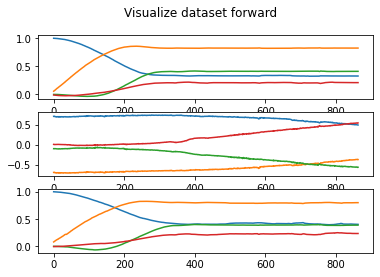

In [233]:
fig, axs = plt.subplots(3)
fig.suptitle('Visualize dataset forward')

axs[0].plot(df0['q0_back_low'])
axs[0].plot(df0['q1_back_low'])
axs[0].plot(df0['q2_back_low'])
axs[0].plot(df0['q3_back_low'])

axs[1].plot(df0['q0_back_mid'])
axs[1].plot(df0['q1_back_mid'])
axs[1].plot(df0['q2_back_mid'])
axs[1].plot(df0['q3_back_mid'])

axs[2].plot(df0['q0_neck'])
axs[2].plot(df0['q1_neck'])
axs[2].plot(df0['q2_neck'])
axs[2].plot(df0['q3_neck'])


### From here we can see that a range from [400:900] is suitable to be used as a base quat
### Compute the base quats (Ignore if you don't want to offset with the base quat)

In [123]:
base_df=df4[900:1400]
base_quat = base_df.mean(axis = 0)
base_quat_back_mid = np.array(base_quat[0: 4])
base_quat_back_low = np.array(base_quat[4: 8])
base_quat_neck = np.array(base_quat[8: 12])

In [204]:
df = pd.concat([df0, df1, df2, df3, df4])
df.head()

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,0.752886,-0.416104,-0.237704,0.447382,0.517248,-0.316295,0.453605,-0.650616,-0.507395,0.294262,0.322177,-0.740903,0
1,0.757055,-0.408983,-0.237987,0.446774,0.507800,-0.308021,0.467234,-0.652381,-0.506942,0.297374,0.319236,-0.741220,0
2,0.756517,-0.411024,-0.229891,0.450038,0.519034,-0.302122,0.478482,-0.637972,-0.504627,0.303594,0.313305,-0.742806,0
3,0.751689,-0.419989,-0.237990,0.445797,0.514019,-0.306143,0.493954,-0.628415,-0.503852,0.309046,0.330900,-0.733370,0
4,0.744534,-0.428553,-0.237795,0.449564,0.507717,-0.322238,0.494073,-0.625285,-0.501926,0.309918,0.326013,-0.736569,0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

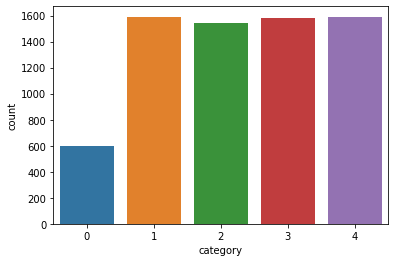

In [145]:
sns.countplot(df['category'])
plt.xticks()

## Offset the whole dataset based on the base quats

In [205]:
class NP_Q:
    
    """
        Set of Numpy based functions to work with quaternions
    """
    
    @classmethod
    def norm(cls, q):
        return np.sqrt(np.dot(q,q))
    
    @classmethod
    def mult(cls, p,q):
        s = p[0]*q[0] - np.dot(p[1:], q[1:])
        v = p[0]*q[1:] + q[0]*p[1:] + np.cross(p[1:], q[1:])
        return np.append([s], v)
    
    @classmethod
    def conjugate(cls, q):
        return np.array([q[0], -q[1], -q[2], -q[3]])
    
    @classmethod
    def inverse(cls, q):
        return cls.conjugate(q) / np.dot(q,q)
    
    @classmethod
    def log(cls, q):
        v = q[1:]
        a = q[0]
        x = a/cls.norm(q)
        real_part = np.log(cls.norm(q))
        vec_part = v/np.linalg.norm(v, axis=-1) * np.arccos(x)
        return np.append([real_part], vec_part)
    
    @classmethod
    def geodesic_dist(cls, q1, q2):
        x = cls.mult(cls.inverse(q1), q2)
        print(x)
        return cls.norm(cls.log(x))
    
    @classmethod
    def angle_dist(cls, q1,q2):
        x = 2*(np.dot(q1,q2))**2 - 1
        return np.arccos(x) / np.pi * 180
    
    @classmethod
    def quad_diff(cls, q1, q2):
        x = cls.mult(cls.inverse(q1), q2)
        return x

In [206]:
# q1 = np.array([1, 0, 0, 0])
# q2 = np.array([0, 1, 0, 0])
#base_quat_neck = np.array([0.25,1,1,1])

df_back_mid = df[['q0_back_mid', 'q1_back_mid', 'q2_back_mid', 'q3_back_mid']]
df_back_low = df[['q0_back_low', 'q1_back_low', 'q2_back_low', 'q3_back_low']]
df_neck = df[['q0_neck', 'q1_neck', 'q2_neck', 'q3_neck']]
#print(NP_Q.quad_diff(base_quat_back_mid, df_back_mid.iloc[0]))
for i, row in df_back_mid.iterrows():
    value = NP_Q.quad_diff(base_quat_back_mid, df_back_mid.iloc[i])
    df_back_mid.iloc[i] = value
for i, row in df_back_low.iterrows():
    df_back_low.iloc[i] = NP_Q.quad_diff(base_quat_back_low, df_back_low.iloc[i])
for i, row in df_neck.iterrows():
    df_neck.iloc[i] = NP_Q.quad_diff(base_quat_neck, df_neck.iloc[i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-206-75901c02d0c4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back_mid.iloc[i] = value
<ipython-input-206-75901c02d0c4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_back_low.iloc[i] = NP_Q.quad_diff(base_quat_back_low, df_back_low.iloc[i])
<ipyth

In [207]:
df = pd.concat([df_back_mid, df_back_low, df_neck, df['category']], axis=1)
df

,q0_back_mid,q1_back_mid,q2_back_mid,q3_back_mid,q0_back_low,q1_back_low,q2_back_low,q3_back_low,q0_neck,q1_neck,q2_neck,q3_neck,category
0,-1.166717,-0.542349,0.417159,0.044270,0.918565,-0.067246,0.151222,-0.466600,0.477081,0.388234,0.680989,-0.589005,0
1,-1.161884,-0.551957,0.417722,0.047423,0.915797,-0.065238,0.170358,-0.465732,0.475813,0.392215,0.681417,-0.586860,0
2,-1.163028,-0.552535,0.414932,0.035643,0.924835,-0.068711,0.175122,-0.445128,0.474687,0.400762,0.681355,-0.582047,0
3,-1.169742,-0.537813,0.414872,0.044712,0.924655,-0.082434,0.188097,-0.438077,0.479163,0.384980,0.694391,-0.573526,0
4,-1.174779,-0.524449,0.418027,0.038306,0.920452,-0.098792,0.185076,-0.444617,0.479530,0.390935,0.691182,-0.573167,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,0.715072,-0.667716,-0.109424,0.166423,0.297071,-0.317917,0.687810,-0.578135,-0.565684,0.504917,0.356038,-0.543274,4
1587,0.710675,-0.672411,-0.114301,0.163152,0.301654,-0.313856,0.687817,-0.577949,-0.567150,0.507250,0.352063,-0.542150,4
1588,0.719943,-0.658863,-0.118551,0.173703,0.303863,-0.319707,0.677353,-0.586055,-0.563820,0.510294,0.344361,-0.547510,4
1589,0.724906,-0.651788,-0.135656,0.167112,0.290341,-0.337547,0.669695,-0.591630,-0.578448,0.488004,0.349883,-0.549255,4


## Sample caculation of how the quat works

In [19]:
sample_quat = NP_Q.quad_diff(base_quat_back_mid, base_quat_back_mid)

In [23]:
from scipy.spatial.transform import Rotation as R
r = R.from_quat(sample_quat)
r.as_matrix()
r.as_euler('zyx', degrees=True)

array([  0.,   0., 180.])

## Convert the quats to euler angles

In [208]:
from scipy.spatial.transform import Rotation as R

df_back_mid = df[['q0_back_mid', 'q1_back_mid', 'q2_back_mid', 'q3_back_mid']]
df_back_low = df[['q0_back_low', 'q1_back_low', 'q2_back_low', 'q3_back_low']]
df_neck = df[['q0_neck', 'q1_neck', 'q2_neck', 'q3_neck']]

angles_back_mid = []
angles_back_low = []
angles_neck = []

for i, row in df_back_mid.iterrows():
    r = R.from_quat(df_back_mid.iloc[i])
    angles_back_low.append(r.as_euler('zyx', degrees=True))

for i, row in df_back_low.iterrows():
    r = R.from_quat(df_back_low.iloc[i])
    angles_back_mid.append(r.as_euler('zyx', degrees=True))
    
for i, row in df_neck.iterrows():
    r = R.from_quat(df_neck.iloc[i])
    angles_neck.append(r.as_euler('zyx', degrees=True))

In [235]:
df_angles_neck = pd.DataFrame(angles_neck, columns=['a1_neck', 'a2_neck', 'a3_neck'])
df_angles_back_mid = pd.DataFrame(angles_back_mid, columns=['a1_bm', 'a2_bm', 'a3_bm'])
df_angles_back_low = pd.DataFrame(angles_back_low, columns=['a1_bl', 'a2_bl', 'a3_bl'])


In [211]:
df_result = df['category'].reset_index()

In [212]:
df_complete = pd.concat([df_angles_neck, df_angles_back_mid, df_angles_back_low, df_result], axis = 1)

In [213]:
df_complete.drop('index', axis = 1, inplace=True)

In [214]:
df_complete

,a1_neck,a2_neck,a3_neck,a1_bm,a2_bm,a3_bm,a1_bl,a2_bl,a3_bl,category
0,-91.950621,9.313770,-68.378521,-0.974043,18.226425,-125.985728,-53.926975,-33.900163,166.719189,0
1,-92.311960,9.102919,-68.592585,-2.195499,20.021225,-125.700881,-54.916100,-33.960389,166.642315,0
2,-92.963032,8.724001,-69.212436,-1.621018,20.711736,-128.300268,-55.085072,-33.265604,165.800425,0
3,-93.528353,10.852977,-68.217151,-0.704554,22.688334,-129.157922,-53.337748,-33.790133,167.030446,0
4,-93.534209,10.404885,-68.770529,0.989657,23.176045,-128.637916,-52.175807,-33.934788,166.741856,0
...,...,...,...,...,...,...,...,...,...,...
6902,91.660110,30.358712,155.766510,99.388430,-40.862087,137.227851,-111.760765,23.584350,-154.630066,4
6903,92.214476,29.872179,155.668307,102.046411,-42.133222,139.280126,-108.433625,25.117413,-155.272045,4
6904,92.233819,28.777433,158.186376,100.485887,-41.660608,139.509427,-107.679823,24.720277,-154.769132,4
6905,92.047389,27.825399,157.151448,102.257238,-43.570523,141.064882,-105.779668,24.375693,-155.686316,4


 # Tree-based model (can skip to NN)

## Train-test split

In [199]:
y = df_complete['category']
X = df_complete.drop(['category'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

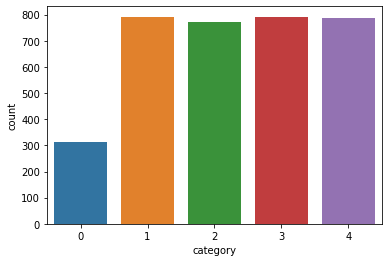

In [196]:
sns.countplot(y_train)
plt.xticks()

## Find a smallest max_depth to avoid overfitting

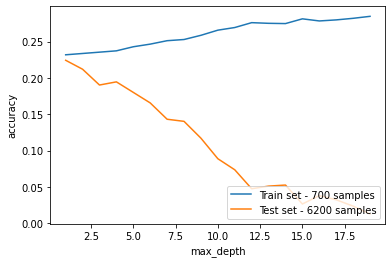

In [202]:
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

train_accuracy_scores = []
test_accuracy_scores = []

for max_depth in range(1, 20):
    clf = tree.DecisionTreeClassifier(criterion='entropy',splitter = 'random', max_depth = max_depth, random_state = 42)
    clf = clf.fit(X_train, y_train)
    
    rfc_predict = clf.predict(X_train)# check performance
    train_acc = accuracy_score(y_train, rfc_predict)
    train_accuracy_scores.append(train_acc)
    #print('Train accuracy score:', train_acc)
    
    rfc_predict = clf.predict(X_test)# check performance
    test_acc = accuracy_score(y_test, rfc_predict)
    test_accuracy_scores.append(test_acc)
    #print('Test accuracy score:', test_acc)

import matplotlib.pyplot as plt
plt.plot(np.arange(1, 20, 1), np.array(train_accuracy_scores), label='Train set - 700 samples')
plt.plot(np.arange(1, 20, 1), np.array(test_accuracy_scores), label='Test set - 6200 samples')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend(loc='lower right')

In [203]:
# load library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

rfc = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 42, max_depth = )

# fit the predictor and target
history = rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
#print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
#print('F1 score:',f1_score(y_test, rfc_predict, average='weighted'))
# print('Precision:',precision_score(y_test, rfc_predict))
# print('Recall:',recall_score(y_test, rfc_predict))

SyntaxError: invalid syntax (<ipython-input-203-650b16603bea>, line 5)

## Final decision tree model

In [142]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', splitter = 'random', max_depth = 7, random_state = 42)
clf = clf.fit(X_train, y_train)
rfc_predict = clf.predict(X_train)# check performance
print('Train accuracy score:',accuracy_score(y_train, rfc_predict))
rfc_predict = clf.predict(X_test)# check performance
print('Test accuracy score:',accuracy_score(y_test, rfc_predict))

Train accuracy score: 0.9749689697972693
Test accuracy score: 0.9729860106126387


# Neural Network

## Generate one-hot encoding for training neural networks

In [215]:
y = df_complete['category']
X = df_complete.drop(['category'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [216]:
y.tail

<bound method NDFrame.tail of 0       0
1       0
2       0
3       0
4       0
       ..
6902    4
6903    4
6904    4
6905    4
6906    4
Name: category, Length: 6907, dtype: int64>

In [217]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

values = array(y_train)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y_train = pd.DataFrame(onehot_encoded)
print(y_train)

        0    1    2    3    4
0     0.0  0.0  0.0  0.0  1.0
1     1.0  0.0  0.0  0.0  0.0
2     0.0  0.0  0.0  1.0  0.0
3     0.0  0.0  0.0  1.0  0.0
4     0.0  0.0  0.0  1.0  0.0
...   ...  ...  ...  ...  ...
4829  0.0  0.0  0.0  1.0  0.0
4830  1.0  0.0  0.0  0.0  0.0
4831  0.0  0.0  0.0  1.0  0.0
4832  0.0  0.0  0.0  1.0  0.0
4833  0.0  0.0  0.0  0.0  1.0

[4834 rows x 5 columns]


In [218]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder

values = array(y_test)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
y_test = pd.DataFrame(onehot_encoded)
print(y_test)

        0    1    2    3    4
0     0.0  0.0  1.0  0.0  0.0
1     0.0  1.0  0.0  0.0  0.0
2     0.0  1.0  0.0  0.0  0.0
3     0.0  1.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  1.0
...   ...  ...  ...  ...  ...
2068  0.0  1.0  0.0  0.0  0.0
2069  0.0  0.0  0.0  0.0  1.0
2070  0.0  0.0  0.0  0.0  1.0
2071  0.0  1.0  0.0  0.0  0.0
2072  0.0  0.0  0.0  1.0  0.0

[2073 rows x 5 columns]


# Neural Network

Epoch 1/300
152/152 [==============================] - 0s 2ms/step - loss: 11260570500437019132428288.0000 - accuracy: 0.2085 - val_loss: 139651288147575008168771584.0000 - val_accuracy: 0.2282
Epoch 2/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.1957 - val_loss: nan - val_accuracy: 0.0801
Epoch 3/300
152/152 [==============================] - 0s 897us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 4/300
152/152 [==============================] - 0s 908us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 5/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 6/300
152/152 [==============================] - 0s 911us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 7/300
152/152 [==============================] - 0s 944us/step - loss: nan - accuracy: 0.0898 - val_loss: nan

152/152 [==============================] - 0s 899us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 60/300
152/152 [==============================] - 0s 869us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 61/300
152/152 [==============================] - 0s 869us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 62/300
152/152 [==============================] - 0s 925us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 63/300
152/152 [==============================] - 0s 861us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 64/300
152/152 [==============================] - 0s 912us/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 65/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 66/300
152/152 [=============

152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 118/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 119/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 120/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 121/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 122/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 123/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 124/300
152/152 [==================

Epoch 176/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 177/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 178/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 179/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 180/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 181/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 182/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 183/300
152/152 [====

Epoch 235/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 236/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 237/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 238/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 239/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 240/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 241/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 242/300
152/152 [====

Epoch 294/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 295/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 296/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 297/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 298/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 299/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Epoch 300/300
152/152 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0898 - val_loss: nan - val_accuracy: 0.0801
Accuracy: 0.089780718088150

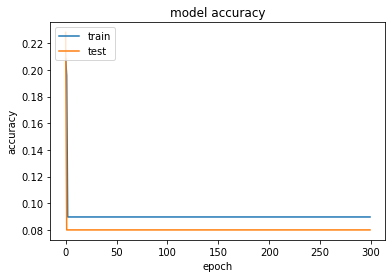

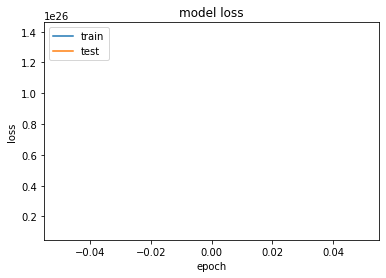

In [219]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD

model = Sequential()

# First hidden layer
model.add(Dense(3, input_shape = (9, ), activation = 'relu'))

# Finally our output with softmax activation
model.add(Dense(5, activation = 'softmax'))

# Create a Stochastic Gradient Descent optimizer with a learn rate of 0.01
# and a decay of 1e-6, which is the amount that the learn rate is decayed
# by periodically. Finally there's a momentum of 0.9 which helps control
# "overshoot"
sgd  = SGD(learning_rate = 0.05, decay = 1e-6, momentum = 0.1)

# Now compile the model. We use a "categorical cross entropy" loss function
# which is more sophisticated than the simple mean-squared loss
# function in the lecture and well suited for classification problems.
# We will look at it again at a later lecture.
model.compile(loss = 'categorical_crossentropy', optimizer = sgd,
             metrics = 'accuracy')
history = model.fit(x = X_train, y = y_train, shuffle = True, 
          epochs = 300, validation_data = (X_test, y_test), verbose=True)

# print("Done testing. Now evaluating:")

# loss, acc = model.evaluate(x = test_x, y = test_y)
# print("Final loss is %3.2f, accuracy is %3.2f." % (loss, acc))

print("Accuracy: " + str(history.history['accuracy'][-1]))
print("Validation Accuracy: " + str(history.history['val_accuracy'][-1]))
print("Loss: " + str(history.history['loss'][-1]))
print("Validation Loss: " + str(history.history['val_loss'][-1]))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save and load the model

In [290]:
model.save('model_nn_5')

INFO:tensorflow:Assets written to: model_nn_5\assets


## Load the model and make prediction

In [176]:
sample = [-0.06437778, -0.9050758, 0.42034901, -0.95735092,  0.03532022,  0.28676069,
    0.66192558, -0.56875487,  0.48823398, -0.49501592, -0.52682804,  0.69094968]
model_input = np.array(sample).reshape(1, -1)
loaded_model.predict_proba(model_input)

array([[0., 0., 0., 0., 1.]])

In [292]:
new_model = tf.keras.models.load_model('model_nn_5')
# Check its architecture
new_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 3)                 39        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 20        
Total params: 59
Trainable params: 59
Non-trainable params: 0
_________________________________________________________________


In [298]:
new_model.predict([X_train[:2]])

array([[3.7388185e-01, 1.2237456e-02, 1.1824635e-25, 6.1387616e-01,
        4.5560678e-06],
       [3.0594801e-03, 2.5249016e-03, 9.4822896e-01, 4.6158127e-02,
        2.8456550e-05]], dtype=float32)

In [300]:
new_model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 686us/step - loss: 0.5290 - accuracy: 0.8326


[0.5289678573608398, 0.8326097726821899]

# Train with a more customized neural network

Accuracy: 0.9989656805992126
Validation Accuracy: 0.9961408376693726
Loss: 0.0074858879670500755
Validation Loss: 0.011378420516848564


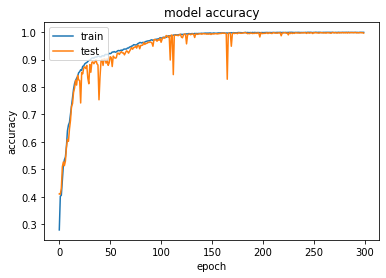

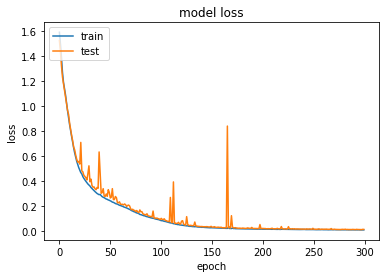

In [173]:
from keras.models import Model
from keras.layers import Dense, Input, Concatenate, Lambda
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import SGD

inputTensor = Input((12,))

group1 = Lambda(lambda x: x[:,:4], output_shape=((2,)))(inputTensor)
group2 = Lambda(lambda x: x[:,4:8], output_shape=((2,)))(inputTensor)
group3 = Lambda(lambda x: x[:,8:12], output_shape=((2,)))(inputTensor)

#second layer in your image
group1 = Dense(4, activation = 'relu')(group1)
group2 = Dense(4, activation = 'relu')(group2)
group3 = Dense(4, activation = 'relu')(group3)  

group1_2 = Dense(3, activation = 'relu')(group1)
group2_2 = Dense(3, activation = 'relu')(group2)
group3_3 = Dense(3, activation = 'relu')(group3)  

outputTensor = Concatenate()([group1_2,group2_2,group3_3])

outputTensor = Dense(5, activation = 'softmax')(outputTensor)

#create the model:
model = Model(inputTensor,outputTensor)

# Create a Stochastic Gradient Descent optimizer with a learn rate of 0.01
# and a decay of 1e-6, which is the amount that the learn rate is decayed
# by periodically. Finally there's a momentum of 0.9 which helps control
# "overshoot"
sgd  = SGD(learning_rate = 0.05, decay = 1e-6, momentum = 0.02)

# Now compile the model. We use a "categorical cross entropy" loss function
# which is more sophisticated than the simple mean-squared loss
# function in the lecture and well suited for classification problems.
# We will look at it again at a later lecture.
model.compile(loss = 'categorical_crossentropy', optimizer = sgd,
             metrics = 'accuracy')
history = model.fit(x = X_train, y = y_train, shuffle = True, 
          epochs = 300, validation_data = (X_test, y_test), verbose=False)

# print("Done testing. Now evaluating:")

# loss, acc = model.evaluate(x = test_x, y = test_y)
# print("Final loss is %3.2f, accuracy is %3.2f." % (loss, acc))

print("Accuracy: " + str(history.history['accuracy'][-1]))
print("Validation Accuracy: " + str(history.history['val_accuracy'][-1]))
print("Loss: " + str(history.history['loss'][-1]))
print("Validation Loss: " + str(history.history['val_loss'][-1]))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [174]:
print(model.summary())

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 12)]         0                                            
__________________________________________________________________________________________________
lambda_33 (Lambda)              (None, 4)            0           input_12[0][0]                   
__________________________________________________________________________________________________
lambda_34 (Lambda)              (None, 4)            0           input_12[0][0]                   
__________________________________________________________________________________________________
lambda_35 (Lambda)              (None, 4)            0           input_12[0][0]                   
___________________________________________________________________________________________